In [1]:
import os
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

## data loading

In [ ]:
dataset_path = "data/synth_sim2real/train"

In [4]:
file_names = glob.glob(f"{dataset_path}/episode_*.npy")
assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

num_trajectories = 100
data = []
for file in tqdm(file_names[:num_trajectories]):
    data.append(np.load(file, allow_pickle=True))

100%|██████████| 3/3 [00:00<00:00, 80.44it/s]


In [15]:
import imageio
logdir = "tmp"
os.makedirs(logdir, exist_ok=True)

for i in range(10):
    imgs = np.stack([d["front_rgb"] for d in data[i]])
    imageio.mimsave(os.path.join(logdir, f"data_gen_{i}.mp4"), imgs)


In [17]:
data[0][0].keys()

dict_keys(['lowdim_qpos', 'lowdim_ee', 'front_rgb', 'shoulder_rgb', 'wrist_rgb', 'obj_pose', 'language_instruction', 'action'])

In [22]:
[len(sample) for sample in data]

[65, 69, 70]

In [27]:
img_key = "front_rgb"

In [34]:
ee_pose = np.concatenate([[np.stack(d["lowdim_ee"]) for d in sample] for sample in data])
actions = np.concatenate([[np.stack(d["action"]) for d in sample] for sample in data])
imgs = np.concatenate([[np.stack(d[img_key]) for d in sample] for sample in data])

## video

In [29]:
import imageio
from IPython.display import Video, display
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

imageio.mimwrite('tmp.mp4', imgs)
display(Video('tmp.mp4'))

In [36]:
act_tmp = actions.copy()

# Sample 3D data
a = ee_pose[:, 6] < 0.05
b = ee_pose[:, 3] < 0.15
final_mask = np.logical_and(a, b)
acts = actions[final_mask]
x, y, z = acts[:, 0], acts[:, 1], acts[:, 2]

# Create a 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            # marker=dict(
            #     size=5,
            #     color=actions[
            #         :, -1
            #     ],  # z,  # set color to an array/list of desired values
            #     # colorscale='inferno',  # choose a colorscale
            #     opacity=0.8,
            # ),
        )
    ]
)

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

## poses

In [39]:
actions[frm:to]

array([[ 4.68482240e-07, -8.98606134e-07, -1.70984769e-07,
         1.33357690e-05,  7.97416495e-06, -3.60647221e-06,
         0.00000000e+00],
       [ 1.56959254e-02, -4.07843114e-02,  4.93940815e-02,
        -1.17896839e-03, -7.56237898e-04,  5.16249810e-02,
         0.00000000e+00],
       [ 2.15795834e-02, -6.03888443e-02,  7.36155719e-02,
         9.72293304e-04,  2.36465550e-03,  2.07962734e-03,
         0.00000000e+00],
       [ 1.43838645e-02, -1.44865571e-02,  2.20082576e-02,
        -4.24232456e-04,  1.54902147e-04,  7.77685824e-04,
         0.00000000e+00],
       [-4.10941804e-03,  1.24005425e-02, -1.51540162e-02,
         2.24929025e-03,  5.38710948e-04, -3.74918699e-04,
         0.00000000e+00],
       [-8.87211479e-03,  2.05687711e-03, -4.72011370e-03,
        -1.24890842e-03, -5.47845789e-04, -1.79328986e-03,
         0.00000000e+00],
       [-1.14268442e-03,  8.75756404e-05,  2.30871719e-04,
         8.44732250e-04,  2.93432033e-03,  3.85267960e-03,
         0.0000000

In [31]:
frm, to = 65 + 69, -1
# [65, 69, 70]

# Sample 3D data
x, y, z = ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x[frm:to],
            y=y[frm:to],
            z=z[frm:to],
            mode="markers",
            marker=dict(
                size=5,
                # color=actions[
                #     :, -1
                # ],
                # colorscale='inferno',
                opacity=0.8,
            ),
        )
    ]
)

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

## actions

In [40]:
# Sample 3D data
x, y, z = actions[:, 0], actions[:, 1], actions[:, 2] # ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5,
                                               color=actions[:,-1], # z,  # set color to an array/list of desired values
                                               #colorscale='inferno',  # choose a colorscale
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


## obj poses

In [11]:
stats = np.load(os.path.join(dataset_path, "obj_poses_train.npy"), allow_pickle=True).tolist()
poses = stats["obj_poses"]
successes = stats["successes"]

Text(0, 0.5, 'x')

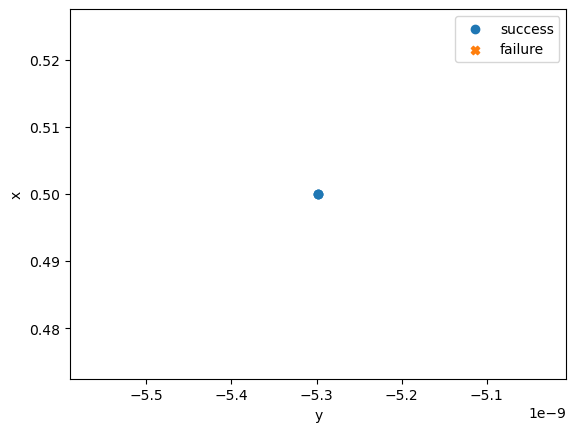

In [12]:
poss = [pos for pos in poses[:,:3]]
poss = np.stack(poss)

plt.scatter(poss[successes, 1], poss[successes, 0], color="tab:blue", label="success")
plt.scatter(poss[~successes, 1], poss[~successes, 0], color="tab:orange", marker="X", label="failure")
plt.legend()
plt.xlabel("y")
plt.ylabel("x")

Text(0.5, 0, 'yaw')

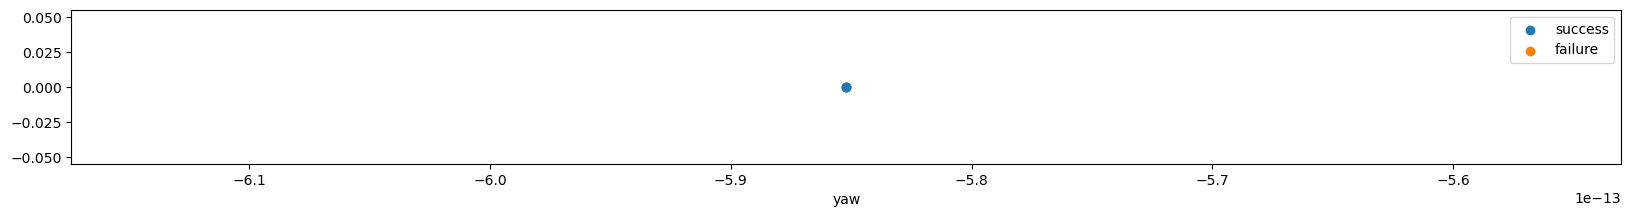

In [13]:
oris = [ori for ori in poses[:,3:]]
oris = np.stack(oris)

plt.figure(figsize=(20,2))
plt.scatter(oris[successes, 2], np.zeros_like(oris[successes, 0]), color="tab:blue", label="success")
plt.scatter(oris[~successes, 2], np.zeros_like(oris[~successes, 0]), color="tab:orange", label="failure")
plt.legend()
plt.xlabel("yaw")

In [14]:
# some of the outer angle randomizations fail

In [15]:
    # # modify data
    
    # dataset_path = "data/green_block/train"
    # key = "215122255213_rgb"
    
    # file_names = glob.glob(f"{dataset_path}/episode_*.npy")
    # assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"
    
    # for file in tqdm(file_names):
    #     data = np.load(file, allow_pickle=True)
    #     for i in range(len(data)):
    #         data[i][key] = data[i][key][:,160:]
    #         print(data[i][key].shape)
    #     np.save(file, data)